## **1.Load the Datasets**

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the data
file_path = '/content/advertising.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

In [ ]:
# Display the first few rows
data.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
# Display the last few rows
data.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


# **2.Data Exploration and Visualization**

In [ ]:
# Summary statistics
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [ ]:
# Check for missing values
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


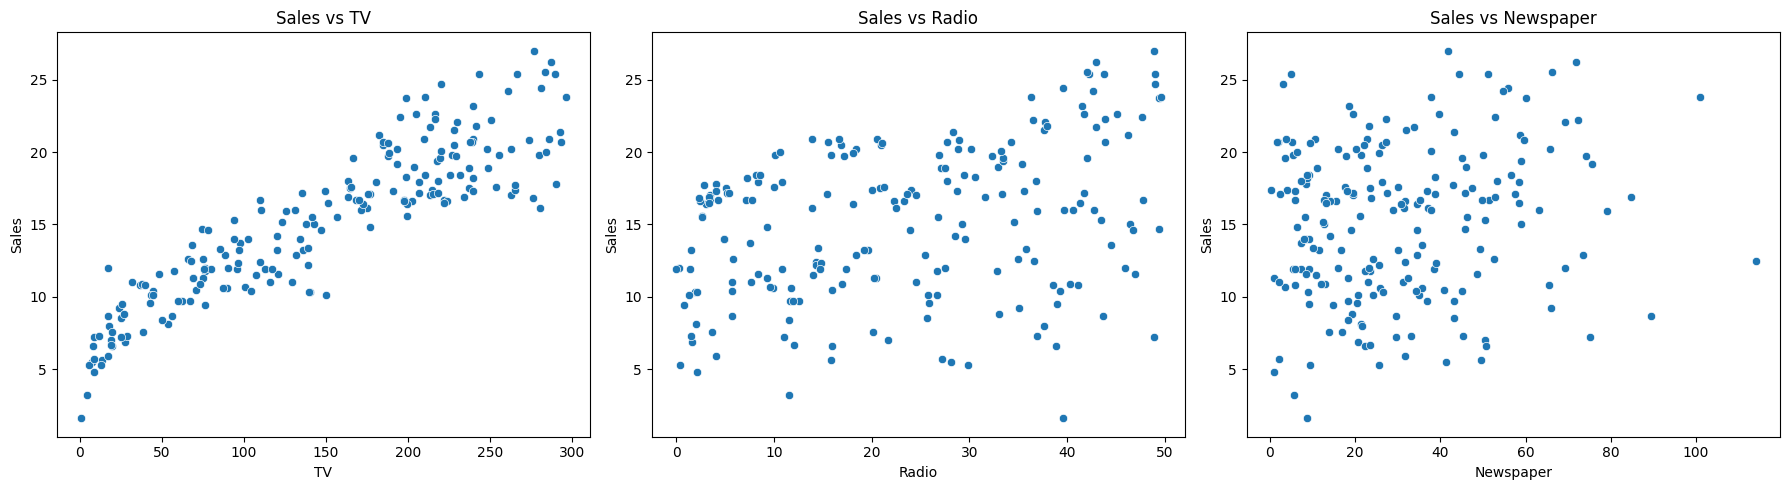

In [ ]:
# Scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(ax=axes[0], x='TV', y='Sales', data=data)
sns.scatterplot(ax=axes[1], x='Radio', y='Sales', data=data)
sns.scatterplot(ax=axes[2], x='Newspaper', y='Sales', data=data)

# Set titles
axes[0].set_title('Sales vs TV')
axes[1].set_title('Sales vs Radio')
axes[2].set_title('Sales vs Newspaper')

plt.tight_layout()
plt.show()

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


# **3.Train-Test Split**

In [ ]:
# Split the data into training and testing sets
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4.Model Training**

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **5.Model Evaluation**

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


# **6.Visualize the Results**

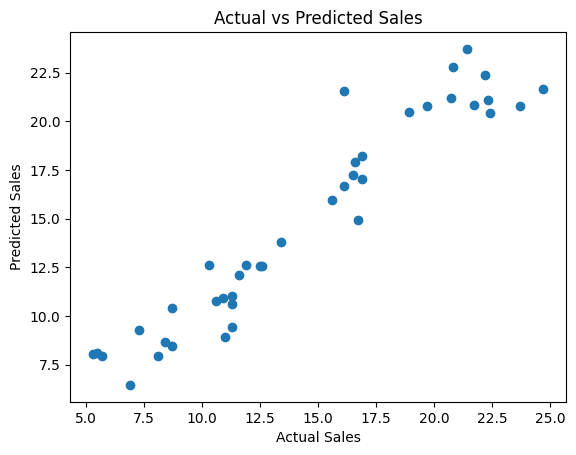

In [ ]:
# Plot actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()